In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis
import seaborn as sns
from warnings import filterwarnings
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sqlalchemy import create_engine
import psycopg2
import streamlit as st
import credentials
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

/home/pkeskin/anaconda3/envs/COMP47750/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data warehouse

### Preprocessing datasets

In [2]:
DF_DW_dataset=pd.read_csv('DW_dataset.csv')

In [3]:
DF_DW_dataset.shape

(16, 9)

In [4]:
DF_DW_dataset.head(2)

,Employee ID,Name,Date of Birth,Gender,Job Title,Salary,Date Joined,Date Left,Address
0,100,Smith,12-Jan-74,M,Director,100000,01-Aug-01,NaN,"12, Green Avenue, Howth, Co. Dublin"
1,125,Jones,06-Apr-89,F,Technician,30000,01-May-01,31-Aug-02,"43, School Road, Malahide, Co. Dublin"


In [5]:
DF_DW_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Employee ID    16 non-null     int64 
 1    Name          16 non-null     object
 2   Date of Birth  16 non-null     object
 3    Gender        16 non-null     object
 4   Job Title      16 non-null     object
 5    Salary        16 non-null     int64 
 6   Date Joined    16 non-null     object
 7   Date Left      7 non-null      object
 8   Address        16 non-null     object
dtypes: int64(2), object(7)
memory usage: 1.2+ KB


In [6]:
DF_DW_dataset.nunique()

Employee ID      16
 Name            16
Date of Birth    16
 Gender           4
Job Title        14
 Salary          14
Date Joined       9
Date Left         7
Address          16
dtype: int64

In [7]:
# Clean the column names to remove white space after the name or in the name
DF_DW_dataset.columns = DF_DW_dataset.columns.str.replace(' ', '')

In [8]:
DF_DW_dataset

,EmployeeID,Name,DateofBirth,Gender,JobTitle,Salary,DateJoined,DateLeft,Address
0,100,Smith,12-Jan-74,M,Director,100000,01-Aug-01,NaN,"12, Green Avenue, Howth, Co. Dublin"
1,125,Jones,06-Apr-89,F,Technician,30000,01-May-01,31-Aug-02,"43, School Road, Malahide, Co. Dublin"
2,167,Davis,19-Jan-82,F,Senior Technician,50000,01-Dec-02,NaN,"10, Main Street, Naas, Co. Kildare"
3,200,O'Bien,03-May-97,M,Technician,25000,01-May-02,30-Nov-02,"Apt 02, High Court, Condalkin. Co. Dublin"
4,205,Edward,16-Nov-95,M,Technician,33000,01-Jan-01,NaN,"33, Barake Street, Clane, Co. Kildare"
5,216,Evans,22-Mar-95,F,S' Technician,44000,01-Aug-01,31-Mar-02,"143, High Street, Niwbridge, Co. Kildare"
6,220,Moore,28-Jun-96,F,Jnr. Technician,22000,01-Jan-02,NaN,"Apt 01, Shreedon Court, Rathcoole, Co. Dublin"
7,301,Rogers,14-Nov-75,M,Deputy Director,60000,01-May-02,NaN,"Manor House, Naas Road, Inchico, Co. Dublin"
8,303,Phillip,14-Oct-76,F,HR Manager,70000,01-Jan-02,NaN,"44, Dublin Road, Finglas, Co. Dublin"
9,344,Shane,06-Jul-86,M,"D"" Director",50000,01-Jan-01,30-Apr-02,"65, Waterway, Killiney, Co. Dublin"


In [9]:
DF_DW_dataset['DateofBirth'] =  pd.to_datetime(DF_DW_dataset['DateofBirth'], format="%d-%b-%y")

In [10]:
DF_DW_dataset['DateJoined'] =  pd.to_datetime(DF_DW_dataset['DateJoined'], format="%d-%b-%y")

In [11]:
DF_DW_dataset['DateLeft'] =  pd.to_datetime(DF_DW_dataset['DateLeft'], format="%d-%b-%y")

In [12]:
DF_DW_dataset.dtypes

EmployeeID              int64
Name                   object
DateofBirth    datetime64[ns]
Gender                 object
JobTitle               object
Salary                  int64
DateJoined     datetime64[ns]
DateLeft       datetime64[ns]
Address                object
dtype: object

In [13]:
DF_DW_dataset_categorical_columns = DF_DW_dataset.select_dtypes(['object']).columns

In [14]:
for column in DF_DW_dataset_categorical_columns:
    DF_DW_dataset[column] = DF_DW_dataset[column].astype('category')  

In [15]:
DF_DW_dataset['EmployeeID'] = DF_DW_dataset['EmployeeID'].astype('category')  

In [16]:
DF_DW_dataset.dtypes

EmployeeID           category
Name                 category
DateofBirth    datetime64[ns]
Gender               category
JobTitle             category
Salary                  int64
DateJoined     datetime64[ns]
DateLeft       datetime64[ns]
Address              category
dtype: object

In [17]:
print('Number of duplicate (excluding first) rows in the table is: ', DF_DW_dataset.duplicated().sum())

Number of duplicate (excluding first) rows in the table is:  0


In [18]:
DF_DW_dataset.select_dtypes(['category']).describe().T

,count,unique,top,freq
EmployeeID,16,16,100,1
Name,16,16,Davis,1
Gender,16,4,M,5
JobTitle,16,14,Technician,3
Address,16,16,"10, Main Street, Naas, Co. Kildare",1


Fixing abnormalities at gender column

In [19]:
set(list(DF_DW_dataset['Gender']))

{' F', ' M', 'F', 'M'}

In [20]:
DF_DW_dataset['Gender'] = DF_DW_dataset['Gender'].replace({' F':'F'}, regex=True)

In [21]:
DF_DW_dataset['Gender'] = DF_DW_dataset['Gender'].replace({' M':'M'}, regex=True)

In [22]:
set(list(DF_DW_dataset['Gender']))

{'F', 'M'}

In [23]:
DF_DW_dataset.select_dtypes(['category']).describe().T

,count,unique,top,freq
EmployeeID,16,16,100,1
Name,16,16,Davis,1
Gender,16,2,M,9
JobTitle,16,14,Technician,3
Address,16,16,"10, Main Street, Naas, Co. Kildare",1


In [24]:
DF_DW_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,16.0,54312.5,24082.410594,22000.0,32250.0,50000.0,72000.0,100000.0


In [25]:
#source: https://online.stat.psu.edu/stat200/lesson/3/3.2
def outlier_ranges(df_attribute):
    sorted(df_attribute)
    Q1=df_attribute.quantile(0.25)
    Q3=df_attribute.quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [26]:
lower_range,upper_range = outlier_ranges(DF_DW_dataset.Salary)

In [27]:
print("lower_range: ",lower_range, " upper_range: ",upper_range )

lower_range:  -27375.0  upper_range:  131625.0


In [28]:
print(min(list(DF_DW_dataset['Salary'])),max((list(DF_DW_dataset['Salary']))))

22000 100000


According to above calculations since min value is above lower range and max value is below upper range there is no outlier in Salary according to IQR rule. 

In [29]:
DF_input_DW_data=pd.read_csv('input_DW_data.csv')

In [30]:
DF_input_DW_data.shape

(9, 5)

In [31]:
DF_input_DW_data

,name,course,semester,instructor,avg_grade
0,A,Eng,1,X,76
1,B,CS,1,Y,66
2,C,CS,1,Y,91
3,B,CS,2,Z,57
4,C,CS,2,Z,88
5,A,Eng,2,X,84
6,B,CS,3,Y,51
7,A,Eng,3,X,61
8,C,CS,3,Y,81


In [32]:
DF_input_DW_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        9 non-null      object
 1   course      9 non-null      object
 2   semester    9 non-null      int64 
 3   instructor  9 non-null      object
 4   avg_grade   9 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 488.0+ bytes


In [33]:
DF_input_DW_data.nunique()

name          3
course        2
semester      3
instructor    3
avg_grade     9
dtype: int64

In [34]:
DF_input_DW_data.columns = DF_input_DW_data.columns.str.replace(' ', '')

In [35]:
DF_input_DW_data_categorical_columns = DF_input_DW_data.select_dtypes(['object']).columns

In [36]:
for column in DF_input_DW_data_categorical_columns:
    DF_input_DW_data[column] = DF_input_DW_data[column].astype('category')  

In [37]:
DF_input_DW_data['semester'] = DF_input_DW_data['semester'].astype('category')  

In [38]:
DF_input_DW_data.dtypes

name          category
course        category
semester      category
instructor    category
avg_grade        int64
dtype: object

In [39]:
DF_input_DW_data.select_dtypes(['category']).describe().T

,count,unique,top,freq
name,9,3,A,3
course,9,2,CS,6
semester,9,3,1,3
instructor,9,3,Y,4


In [40]:
DF_input_DW_data.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_grade,9.0,72.777778,14.472196,51.0,61.0,76.0,84.0,91.0


No abnormality found at DF_input_DW_data to fix. 

### Creating read_sql() function to make OLAP queries into a data frame.

writing datasets to sql

In [41]:
def get_engine():
    '''Used to create the engine'''
    db_name = credentials.db_database 
    uri = credentials.db_uri
    user = credentials.db_user
    password = credentials.db_password
    port = credentials.db_port
    return create_engine(f"postgresql://{user}:{password}@{uri}:{port}/{db_name}",echo=False)

In [42]:
def add_tables(df_tables,table_names):
    engine = get_engine()
    for i in range(len(df_tables)):
        df_tables[i].to_sql(table_names[i], con=engine, if_exists='replace',index=False)

In [43]:
add_tables([DF_DW_dataset],['dw_dataset'])

### Exploring DB with set of queries.

####  Calculating the average salary of management staff for males and females separately by consider all directors and managers in ‘Management’ and all technicians in the ‘Technical’ staff category.

average salary of management staff for males

In [44]:
query1='select AVG('+'"Salary"'+') from public.dw_dataset where' +' "Gender" = '+"'"+ 'M'+"'"+' and "JobTitle" LIKE '+"'"+ '%%Director%%'+"'"
query1

'select AVG("Salary") from public.dw_dataset where "Gender" = \'M\' and "JobTitle" LIKE \'%%Director%%\''

In [45]:
DW_dataset_avg_salary_man_mal= pd.read_sql(query1, get_engine());
DW_dataset_avg_salary_man_mal

,avg
0,72500.0


average salary of management staff for females

In [46]:
query2='select AVG('+'"Salary"'+') from public.dw_dataset where' +' "Gender" = '+"'"+ 'F'+"'"+' and "JobTitle" LIKE '+"'"+ '%%Director%%'+"'"
query2

'select AVG("Salary") from public.dw_dataset where "Gender" = \'F\' and "JobTitle" LIKE \'%%Director%%\''

In [47]:
DW_dataset_avg_salary_man_fem= pd.read_sql(query2, get_engine());
DW_dataset_avg_salary_man_fem

,avg
0,74000.0


#### Calculate the difference in average salaries of employees between the counties of Kildare and Dublin

In [48]:
query3='Select((select AVG('+'"Salary"'+') from public.dw_dataset where' +'"Address" LIKE '+"'"+ '%%Kildare%%'+"')-"+'(select AVG('+'"Salary"'+') from public.dw_dataset where' +'"Address" LIKE '+"'"+ '%%Dublin%%'+"'))"
query3

'Select((select AVG("Salary") from public.dw_dataset where"Address" LIKE \'%%Kildare%%\')-(select AVG("Salary") from public.dw_dataset where"Address" LIKE \'%%Dublin%%\'))'

In [49]:
DW_dataset_avg_salary_kil_dub= pd.read_sql(query3, get_engine());
DW_dataset_avg_salary_kil_dub

,?column?
0,11766.666667


#### Number of people are employed at the end of 2002 who were born in the 1970s, 1980s and 1990s ( assuming 2022 was a typo as nobody joined in 2022 in this dataset)

In [50]:
query4='select EXTRACT(DECADE FROM "DateofBirth" ) , COUNT("EmployeeID") from public.dw_dataset where '+ 'EXTRACT(DECADE FROM "DateofBirth" )= '+"'"+'197'+"'"+ ' or '+'EXTRACT(DECADE FROM "DateofBirth" )= '+"'"+'198'+"'"+ ' or '+'EXTRACT(DECADE FROM "DateofBirth" )= '+"'"+'199'+"'"+ 'and EXTRACT(YEAR FROM "DateJoined" )= '+"'"+'2002'+"'"+' group by EXTRACT(DECADE FROM "DateofBirth" )'
query4

'select EXTRACT(DECADE FROM "DateofBirth" ) , COUNT("EmployeeID") from public.dw_dataset where EXTRACT(DECADE FROM "DateofBirth" )= \'197\' or EXTRACT(DECADE FROM "DateofBirth" )= \'198\' or EXTRACT(DECADE FROM "DateofBirth" )= \'199\'and EXTRACT(YEAR FROM "DateJoined" )= \'2002\' group by EXTRACT(DECADE FROM "DateofBirth" )'

In [51]:
DW_dataset_emp_2002_197= pd.read_sql(query4, get_engine());
DW_dataset_emp_2002_197

,date_part,count
0,197.0,5
1,198.0,6
2,199.0,2


#### Given the employee retention rate is the % of staff who stayed during a period (compared to the beginning of that period), the employee retention rates in 2001 and 2002 are :

what are the employee retention rates in 2001 ?

In [52]:
query5= 'Select((((select COUNT("EmployeeID") from public.dw_dataset where '+' (EXTRACT(YEAR FROM "DateLeft" )> '+"'"+'2001'+"'"+ ' or "DateLeft" is null) and (EXTRACT(YEAR FROM "DateJoined" )<= '+"'"+'2001'+"'"+' ))-(select COUNT("EmployeeID") from public.dw_dataset where '+'(EXTRACT(YEAR FROM "DateLeft" )= '+"'"+'2001'+"'"+' ) and (EXTRACT(YEAR FROM "DateJoined" )< '+"'"+'2001'+"'"+ ' )))/(select COUNT("EmployeeID") from public.dw_dataset where (EXTRACT(YEAR FROM "DateLeft" )> '+"'"+'2001'+"'"+ ' or "DateLeft" is null) and (EXTRACT(YEAR FROM "DateJoined" )<= '+"'"+'2001'+"'"+ ' )))*100)'
query5

'Select((((select COUNT("EmployeeID") from public.dw_dataset where  (EXTRACT(YEAR FROM "DateLeft" )> \'2001\' or "DateLeft" is null) and (EXTRACT(YEAR FROM "DateJoined" )<= \'2001\' ))-(select COUNT("EmployeeID") from public.dw_dataset where (EXTRACT(YEAR FROM "DateLeft" )= \'2001\' ) and (EXTRACT(YEAR FROM "DateJoined" )< \'2001\' )))/(select COUNT("EmployeeID") from public.dw_dataset where (EXTRACT(YEAR FROM "DateLeft" )> \'2001\' or "DateLeft" is null) and (EXTRACT(YEAR FROM "DateJoined" )<= \'2001\' )))*100)'

In [53]:
DW_dataset_emp_ret_2001= pd.read_sql(query5, get_engine());
DW_dataset_emp_ret_2001

,?column?
0,100


what are the employee retention rates in 2002?

In [54]:
query6= 'Select((cast((select COUNT("EmployeeID") from public.dw_dataset where '+' (EXTRACT(YEAR FROM "DateLeft" )> '+"'"+'2002'+"'"+ ' or "DateLeft" is null) and (EXTRACT(YEAR FROM "DateJoined" )<= '+"'"+'2002'+"'"+' ))-(select COUNT("EmployeeID") from public.dw_dataset where '+'(EXTRACT(YEAR FROM "DateLeft" )= '+"'"+'2002'+"'"+' ) and (EXTRACT(YEAR FROM "DateJoined" )< '+"'"+'2002'+"'"+ ' ))as decimal)/(select COUNT("EmployeeID") from public.dw_dataset where (EXTRACT(YEAR FROM "DateLeft" )> '+"'"+'2002'+"'"+ ' or "DateLeft" is null) and (EXTRACT(YEAR FROM "DateJoined" )<= '+"'"+'2002'+"'"+ ' )))*100)'
query6

'Select((cast((select COUNT("EmployeeID") from public.dw_dataset where  (EXTRACT(YEAR FROM "DateLeft" )> \'2002\' or "DateLeft" is null) and (EXTRACT(YEAR FROM "DateJoined" )<= \'2002\' ))-(select COUNT("EmployeeID") from public.dw_dataset where (EXTRACT(YEAR FROM "DateLeft" )= \'2002\' ) and (EXTRACT(YEAR FROM "DateJoined" )< \'2002\' ))as decimal)/(select COUNT("EmployeeID") from public.dw_dataset where (EXTRACT(YEAR FROM "DateLeft" )> \'2002\' or "DateLeft" is null) and (EXTRACT(YEAR FROM "DateJoined" )<= \'2002\' )))*100)'

In [55]:
DW_dataset_emp_ret_2002= pd.read_sql(query6, get_engine());
DW_dataset_emp_ret_2002

,?column?
0,75.0


#### Retention rates based on the quarter of the years 2001 and 2002.

retention rates based on the quarter of the year 2002.

In [56]:
DW_dataset_emp_ret_2002_q = pd.DataFrame()
for q in range(1,5):
    q=str(q)
    query7='Select((cast((select COUNT("EmployeeID") from public.dw_dataset where (EXTRACT(YEAR FROM "DateLeft" )>'+"'"+'2002'+"'"+' or "DateLeft" is null or (EXTRACT(YEAR FROM "DateLeft" )='+"'"+'2002'+"'"+' and EXTRACT(QUARTER FROM "DateLeft" )>'+"'"+q+"'"+')) and ((EXTRACT(YEAR FROM "DateJoined" )<='+"'"+'2002'+"'"+') or ((EXTRACT(YEAR FROM "DateJoined" )='+"'"+'2002'+"'"+')and EXTRACT(QUARTER FROM "DateLeft" )<'+"'"+q+"'"+'))) - (select COUNT("EmployeeID") from public.dw_dataset where (EXTRACT(YEAR FROM "DateLeft" )='+"'"+'2002'+"'"+') and (EXTRACT(QUARTER FROM "DateLeft" )='+"'"+q+"'"+') and (EXTRACT(YEAR FROM "DateJoined" )<'+"'"+'2002'+"'"+'))as decimal)/(select COUNT("EmployeeID") from public.dw_dataset where (EXTRACT(YEAR FROM "DateLeft" )>'+"'"+'2002'+"'"+' or "DateLeft" is null or (EXTRACT(YEAR FROM "DateLeft" )='+"'"+'2002'+"'"+' and EXTRACT(QUARTER FROM "DateLeft" )>'+"'"+q+"'"+')) and ((EXTRACT(YEAR FROM "DateJoined" )<='+"'"+'2002'+"'"+') or ((EXTRACT(YEAR FROM "DateJoined" )='+"'"+'2002'+"'"+')and EXTRACT(QUARTER FROM "DateLeft" )<'+"'"+q+"'"+'))))*100)'
    data=pd.read_sql(query7, get_engine())
    data['quarter']=q
    DW_dataset_emp_ret_2002_q=DW_dataset_emp_ret_2002_q.append(data)
DW_dataset_emp_ret_2002_q

,?column?,quarter
0,93.333333,1
0,92.857143,2
0,92.307692,3
0,100.000000,4


retention rates based on the quarter of the years 2001.

In [57]:
DW_dataset_emp_ret_2001_q = pd.DataFrame()
for q in range(1,5):
    q=str(q)
    query7='Select((cast((select COUNT("EmployeeID") from public.dw_dataset where (EXTRACT(YEAR FROM "DateLeft" )>'+"'"+'2001'+"'"+' or "DateLeft" is null or (EXTRACT(YEAR FROM "DateLeft" )='+"'"+'2001'+"'"+' and EXTRACT(QUARTER FROM "DateLeft" )>'+"'"+q+"'"+')) and ((EXTRACT(YEAR FROM "DateJoined" )<='+"'"+'2001'+"'"+') or ((EXTRACT(YEAR FROM "DateJoined" )='+"'"+'2001'+"'"+')and EXTRACT(QUARTER FROM "DateLeft" )<'+"'"+q+"'"+'))) - (select COUNT("EmployeeID") from public.dw_dataset where (EXTRACT(YEAR FROM "DateLeft" )='+"'"+'2001'+"'"+') and (EXTRACT(QUARTER FROM "DateLeft" )='+"'"+q+"'"+') and (EXTRACT(YEAR FROM "DateJoined" )<'+"'"+'2001'+"'"+'))as decimal)/(select COUNT("EmployeeID") from public.dw_dataset where (EXTRACT(YEAR FROM "DateLeft" )>'+"'"+'2001'+"'"+' or "DateLeft" is null or (EXTRACT(YEAR FROM "DateLeft" )='+"'"+'2001'+"'"+' and EXTRACT(QUARTER FROM "DateLeft" )>'+"'"+q+"'"+')) and ((EXTRACT(YEAR FROM "DateJoined" )<='+"'"+'2001'+"'"+') or ((EXTRACT(YEAR FROM "DateJoined" )='+"'"+'2001'+"'"+')and EXTRACT(QUARTER FROM "DateLeft" )<'+"'"+q+"'"+'))))*100)'
    data=pd.read_sql(query7, get_engine())
    data['quarter']=q
    DW_dataset_emp_ret_2001_q=DW_dataset_emp_ret_2001_q.append(data)
DW_dataset_emp_ret_2001_q

,?column?,quarter
0,100.0,1
0,100.0,2
0,100.0,3
0,100.0,4


## Implementating Data Warehouse

In [58]:
DF_input_DW_data

,name,course,semester,instructor,avg_grade
0,A,Eng,1,X,76
1,B,CS,1,Y,66
2,C,CS,1,Y,91
3,B,CS,2,Z,57
4,C,CS,2,Z,88
5,A,Eng,2,X,84
6,B,CS,3,Y,51
7,A,Eng,3,X,61
8,C,CS,3,Y,81


#### Given that a data warehouse for Big University consists of the four dimensions student, course, semester, and instructor, and two measures count and avg_grade. At the lowest conceptual level (e.g., for a given student, course, semester, and instructor combination), the avg_grade measure stores the actual course grade of the student. At higher conceptual levels, avg_grade stores the average grade for the given combination.

### Drawing schema diagram for the data warehouse. 

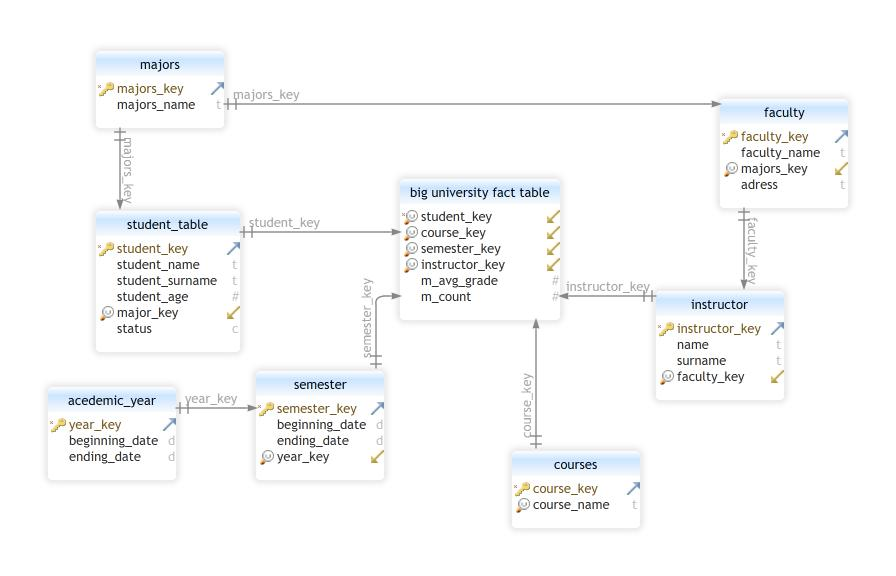
 * This is Fact Constellation schema diagram

#### Remarks:

####  Starting with the base cuboid [student, course, semester, instructor],  specific OLAP operations to perform to list the average grade of CS courses for each Big University student.

At my schema first we select avg grade for all students major in cs from base cuboid, then we roll up at semesters and reduce dimention to acedemic year and we obtain desired result

#### Given each dimension has five levels (including all), such as “student < major < status < university < all”, number of cuboids will this cube contain including the base and apex cuboids:

4 dimentions"student, course, semester, and instructor" and each dimention have 5 level for each measure 5^4 cuboid computed so we have 2 measure so it makes (5^4)*2=1250 cuboid contained in this cube.

#### Creating a data file that contains enough entries, called “input_DW_data.csv”, and storing in DW.

In [59]:
add_tables([DF_input_DW_data],['input_dw_data'])

In [60]:
DF_input_DW_data=pd.read_sql('SELECT * FROM public."input_dw_data"', get_engine())

In [61]:
DF_input_DW_data

,name,course,semester,instructor,avg_grade
0,A,Eng,1,X,76
1,B,CS,1,Y,66
2,C,CS,1,Y,91
3,B,CS,2,Z,57
4,C,CS,2,Z,88
5,A,Eng,2,X,84
6,B,CS,3,Y,51
7,A,Eng,3,X,61
8,C,CS,3,Y,81


#### Defining the functions to read, write, update and list your data to/from the data warehouse.

Referance: https://www.analyticsvidhya.com/blog/2021/06/how-to-build-a-data-warehouse-using-postgresql-in-python/

In [62]:
def read_record(field,name,engine):
    result = engine.execute("SELECT %s FROM public.input_dw_data where name='%s'" % (field,name))
    return result.fetchall()

In [63]:
read_record('course','A',get_engine())

[('Eng',), ('Eng',), ('Eng',)]

In [64]:
def write_record(name, course, semester, instructor, avg_grade, engine):
    engine.execute("Insert INTO public.input_dw_data (name, course, semester,instructor,avg_grade) VALUES ('%s','%s','%s','%s',%s)" % (name, course, semester, instructor, avg_grade))

In [65]:
write_record('test','test','test','test',1,get_engine())

In [66]:
def update_record(field,name,new_value,engine):
    engine.execute("UPDATE public.input_dw_data SET %s = '%s' WHERE name = '%s'" % (field,new_value,name))

In [67]:
update_record('course','test','new_test',get_engine())

In [68]:
def read_dataset(name,engine):
    try:
        dataset = pd.read_sql_table(name,engine)
    except:
        dataset = pd.DataFrame([])
    return dataset

In [69]:
read_dataset('input_dw_data',get_engine())

,name,course,semester,instructor,avg_grade
0,A,Eng,1,X,76
1,B,CS,1,Y,66
2,C,CS,1,Y,91
3,B,CS,2,Z,57
4,C,CS,2,Z,88
5,A,Eng,2,X,84
6,B,CS,3,Y,51
7,A,Eng,3,X,61
8,C,CS,3,Y,81
9,test,new_test,test,test,1


In [70]:
def write_dataset(name,dataset,engine):
    dataset.to_sql('%s' % (name),engine,index=False,if_exists='replace')

In [71]:
write_dataset('test',DF_input_DW_data,get_engine())

In [72]:
def list_datasets(engine):
    datasets = engine.execute("SELECT table_name FROM information_schema.tables WHERE table_schema = 'public' ORDER BY table_name;")
    return datasets.fetchall()

In [73]:
list_datasets(get_engine())

[('dw_dataset',), ('input_dw_data',), ('test',)]